In [1]:
# HCASE Experiments Cherry Picked Scaffolds in Reduced HCASE Space
#
# Author: Gergely Zahoranszky-Kohalmi, PhD
#
# Email: gergely.zahoranszky-kohalmi@nih.gov
#
# Organization: National Center for Advancing Translational Sciences (NCATS/NIH)
#

In [2]:
import hcase
import pandas as pd

import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import seaborn as sns

import math

In [3]:
# Config section



fname_reference_scaffolds = '../data/red_ref_scaffolds.tab'
fname_structures = '../data/cherrypicked_scaffolds.tab'


fname_out_space = '../data/red_hc_space.tab'
fname_out_embedding = '../data/red_cp_scaffolds_hcase_chembl_24_1_bms_dim_2.tab'



fname_out_cp_scaffold_hcase_embedding_plot = '../plots/cp_scaffolds/si_red_cp_scaffolds_hcase_chembl_24_1_bms_dim_2.png'
fname_out_colored_embedding = '../data/si_red_cp_scaffolds_all_hcase_embedding_coords_chembl_24_1_bms.tab'

n_dim = 2



use_precomputed_reference_space = True

do_downsampling = False
rnd_seed = 55555
sample_size = 200



In [4]:
# Import datasets

df_ref_scaffolds = pd.read_csv (fname_reference_scaffolds, sep = '\t')
df_structures = pd.read_csv (fname_structures, sep = '\t')



In [5]:
# Functions




def panel_plot_multi_scaffolds (subfig, df, subfig_label, z):
    #print(df.columns)

    #print(df.head)
    

    # Comment this out if you want image titles.
    #plt.title (title)

    subfig_label += str(z)
    
    tab10_palette = ['#1179B0', '#F58C30', '#74BB5A', '#BC412C', '#795B9A', '#764A0C', '#D37DB5', '#7A7A7A', '#B8C449']

    df_1 = df[df['color'] == 1].copy()
    df_2 = df[df['color'] == 2].copy()
    df_3 = df[df['color'] == 3].copy()
    df_4 = df[df['color'] == 4].copy()
    df_5 = df[df['color'] == 5].copy()
    df_6 = df[df['color'] == 6].copy()
    df_7 = df[df['color'] == 7].copy()
    df_8 = df[df['color'] == 8].copy()
    df_9 = df[df['color'] == 9].copy()


    color_1 = list(df_1['color'])[0] - 1
    color_2 = list(df_2['color'])[0] - 1
    color_3 = list(df_3['color'])[0] - 1
    color_4 = list(df_4['color'])[0] - 1
    color_5 = list(df_5['color'])[0] - 1
    color_6 = list(df_6['color'])[0] - 1
    color_7 = list(df_7['color'])[0] - 1
    color_8 = list(df_8['color'])[0] - 1
    color_9 = list(df_9['color'])[0] - 1
 
    #print("color")
    #print(color_1)




    subfig.scatter(df_1['Dim_1'].values, df_1['Dim_2'].values, c = tab10_palette[color_1], alpha = 0.3, marker = 'o', s = 100)
    subfig.scatter(df_2['Dim_1'].values, df_2['Dim_2'].values, c = tab10_palette[color_2], alpha = 0.3, marker = 'o', s = 100)
    subfig.scatter(df_3['Dim_1'].values, df_3['Dim_2'].values, c = tab10_palette[color_3], alpha = 0.3, marker = 'o', s = 100)
    subfig.scatter(df_4['Dim_1'].values, df_4['Dim_2'].values, c = tab10_palette[color_4], alpha = 0.3, marker = 'o', s = 100)
    subfig.scatter(df_5['Dim_1'].values, df_5['Dim_2'].values, c = tab10_palette[color_5], alpha = 0.3, marker = 'o', s = 100)
    subfig.scatter(df_6['Dim_1'].values, df_6['Dim_2'].values, c = tab10_palette[color_6], alpha = 0.3, marker = 'o', s = 100)
    subfig.scatter(df_7['Dim_1'].values, df_7['Dim_2'].values, c = tab10_palette[color_7], alpha = 0.3, marker = 'o', s = 100)
    subfig.scatter(df_8['Dim_1'].values, df_8['Dim_2'].values, c = tab10_palette[color_8], alpha = 0.3, marker = 'o', s = 100)
    subfig.scatter(df_9['Dim_1'].values, df_9['Dim_2'].values, c = tab10_palette[color_9], alpha = 0.3, marker = 'o', s = 100)

    subfig.set_title (subfig_label, fontsize=24)
    subfig.set_xlabel ('Dim 1', fontsize=20)
    subfig.set_ylabel ('Dim 2', fontsize=20)
    

    subfig.set_xlim(left = -1)
    subfig.set_ylim(bottom = -1)    
    subfig.set_xlim(right = int(math.pow(2, z)) - 1 + 5)
    subfig.set_ylim(top = int(math.pow(2, z)) - 1 + 5)
    


def color_scaffolds (df_coords, df_color):
    df = df_coords.merge(df_color, on = 'id', how = 'inner')
    
    return (df)



In [6]:
# Clean-up datasets

df_structures = df_structures.rename (columns = {'scaffold_id': 'id'})





In [7]:
# Reduce datasets for workflow development (optional)

if do_downsampling:

    df_ref_scaffolds = df_ref_scaffolds.sample (n = sample_size, random_state = rnd_seed)
    df_structures = df_structures.sample (n = sample_size, random_state = rnd_seed)



In [8]:
# Create ChEMBL Scaffold space

if not use_precomputed_reference_space:
    
    df_hcase_space = hcase.train (df_ref_scaffolds)
    df_hcase_space.to_csv (fname_out_space, sep = '\t', index = False)

else:
    
    df_hcase_space = pd.read_csv (fname_out_space, sep = '\t')


In [9]:
# Embed structures into HCASE space

print (df_structures.head)
    
df_embedded = hcase.embed (df_hcase_space, df_structures, n_dim)




<bound method NDFrame.head of                                              structure  order  \
0                                C1=C(NCc2cccnc2)NCNC1   4950   
1                                O=C1OCCN=C1NNc1ccccc1   4951   
2                               O=C1OCOC=C1N=Nc1ccccc1   4952   
3                                  C1=NCNCN1CCc1ccccc1   4953   
4                                C1=NCN(CCc2ccccc2)CN1   4954   
..                                                 ...    ...   
904  O=S(=O)(N=Cc1ccc(N2CCN(Cc3ccccc3-c3ccccc3)CC2)...  55046   
905  O=C(NS(=O)(=O)c1ccc(NCC2CCOCC2)cc1)c1ccc(N2CCN...  55047   
906  O=C1C[C@@H](O[C@H]2CCCCO2)C[C@@H](O[C@H]2CCCCO...  55048   
907  C(CC[C@H]1CCC2C(CC[C@H]3[C@@H]4CCCC4CC[C@H]23)...  55049   
908  O=C(Nc1ccc2c(c1)CN[C@H](C(=O)N[C@@H]1CCCc3cccc...  55050   

                  id                                       scaffold_key  color  
0     scaffold.20148  14 2 3 2 0 6 1 1 4 0 0 0 4 4 0 0 0 4 0 0 0 2 0...      1  
1     scaffold.26725  14 2 

[01:43:57] WARNING: Omitted undefined stereo
[01:43:57] WARNING: Omitted undefined stereo
[01:43:57] WARNING: Omitted undefined stereo
[01:43:57] WARNING: Omitted undefined stereo
[01:43:57] WARNING: Omitted undefined stereo
[01:43:57] WARNING: Omitted undefined stereo
[01:43:57] WARNING: Omitted undefined stereo
[01:43:57] WARNING: Proton(s) added/removed
[01:43:57] WARNING: Proton(s) added/removed; Omitted undefined stereo
[01:43:57] WARNING: Proton(s) added/removed; Omitted undefined stereo
[01:43:57] WARNING: Proton(s) added/removed
[01:43:57] WARNING: Proton(s) added/removed
[01:43:57] WARNING: Omitted undefined stereo
[01:43:57] WARNING: Proton(s) added/removed
[01:43:57] WARNING: Omitted undefined stereo
[01:43:57] WARNING: Proton(s) added/removed
[01:43:57] WARNING: Proton(s) added/removed
[01:43:57] WARNING: Omitted undefined stereo
[01:43:57] WARNING: Proton(s) added/removed
[01:43:57] WARNING: Omitted undefined stereo
[01:43:57] WARNING: Proton(s) added/removed; Omitted unde

[*] Number of input structures: 909
[*] Number of structures for which scaffold_key was generated: 909
[*] Finding closest reference scaffold for structure 1 out of 909 .
[*] Finding closest reference scaffold for structure 2 out of 909 .
[*] Finding closest reference scaffold for structure 3 out of 909 .
[*] Finding closest reference scaffold for structure 4 out of 909 .
[*] Finding closest reference scaffold for structure 5 out of 909 .
[*] Finding closest reference scaffold for structure 6 out of 909 .
[*] Finding closest reference scaffold for structure 7 out of 909 .
[*] Finding closest reference scaffold for structure 8 out of 909 .
[*] Finding closest reference scaffold for structure 9 out of 909 .
[*] Finding closest reference scaffold for structure 10 out of 909 .
[*] Finding closest reference scaffold for structure 11 out of 909 .
[*] Finding closest reference scaffold for structure 12 out of 909 .
[*] Finding closest reference scaffold for structure 13 out of 909 .
[*] Findi

[*] Finding closest reference scaffold for structure 119 out of 909 .
[*] Finding closest reference scaffold for structure 120 out of 909 .
[*] Finding closest reference scaffold for structure 121 out of 909 .
[*] Finding closest reference scaffold for structure 122 out of 909 .
[*] Finding closest reference scaffold for structure 123 out of 909 .
[*] Finding closest reference scaffold for structure 124 out of 909 .
[*] Finding closest reference scaffold for structure 125 out of 909 .
[*] Finding closest reference scaffold for structure 126 out of 909 .
[*] Finding closest reference scaffold for structure 127 out of 909 .
[*] Finding closest reference scaffold for structure 128 out of 909 .
[*] Finding closest reference scaffold for structure 129 out of 909 .
[*] Finding closest reference scaffold for structure 130 out of 909 .
[*] Finding closest reference scaffold for structure 131 out of 909 .
[*] Finding closest reference scaffold for structure 132 out of 909 .
[*] Finding closest 

[*] Finding closest reference scaffold for structure 237 out of 909 .
[*] Finding closest reference scaffold for structure 238 out of 909 .
[*] Finding closest reference scaffold for structure 239 out of 909 .
[*] Finding closest reference scaffold for structure 240 out of 909 .
[*] Finding closest reference scaffold for structure 241 out of 909 .
[*] Finding closest reference scaffold for structure 242 out of 909 .
[*] Finding closest reference scaffold for structure 243 out of 909 .
[*] Finding closest reference scaffold for structure 244 out of 909 .
[*] Finding closest reference scaffold for structure 245 out of 909 .
[*] Finding closest reference scaffold for structure 246 out of 909 .
[*] Finding closest reference scaffold for structure 247 out of 909 .
[*] Finding closest reference scaffold for structure 248 out of 909 .
[*] Finding closest reference scaffold for structure 249 out of 909 .
[*] Finding closest reference scaffold for structure 250 out of 909 .
[*] Finding closest 

[*] Finding closest reference scaffold for structure 355 out of 909 .
[*] Finding closest reference scaffold for structure 356 out of 909 .
[*] Finding closest reference scaffold for structure 357 out of 909 .
[*] Finding closest reference scaffold for structure 358 out of 909 .
[*] Finding closest reference scaffold for structure 359 out of 909 .
[*] Finding closest reference scaffold for structure 360 out of 909 .
[*] Finding closest reference scaffold for structure 361 out of 909 .
[*] Finding closest reference scaffold for structure 362 out of 909 .
[*] Finding closest reference scaffold for structure 363 out of 909 .
[*] Finding closest reference scaffold for structure 364 out of 909 .
[*] Finding closest reference scaffold for structure 365 out of 909 .
[*] Finding closest reference scaffold for structure 366 out of 909 .
[*] Finding closest reference scaffold for structure 367 out of 909 .
[*] Finding closest reference scaffold for structure 368 out of 909 .
[*] Finding closest 

[*] Finding closest reference scaffold for structure 473 out of 909 .
[*] Finding closest reference scaffold for structure 474 out of 909 .
[*] Finding closest reference scaffold for structure 475 out of 909 .
[*] Finding closest reference scaffold for structure 476 out of 909 .
[*] Finding closest reference scaffold for structure 477 out of 909 .
[*] Finding closest reference scaffold for structure 478 out of 909 .
[*] Finding closest reference scaffold for structure 479 out of 909 .
[*] Finding closest reference scaffold for structure 480 out of 909 .
[*] Finding closest reference scaffold for structure 481 out of 909 .
[*] Finding closest reference scaffold for structure 482 out of 909 .
[*] Finding closest reference scaffold for structure 483 out of 909 .
[*] Finding closest reference scaffold for structure 484 out of 909 .
[*] Finding closest reference scaffold for structure 485 out of 909 .
[*] Finding closest reference scaffold for structure 486 out of 909 .
[*] Finding closest 

[*] Finding closest reference scaffold for structure 591 out of 909 .
[*] Finding closest reference scaffold for structure 592 out of 909 .
[*] Finding closest reference scaffold for structure 593 out of 909 .
[*] Finding closest reference scaffold for structure 594 out of 909 .
[*] Finding closest reference scaffold for structure 595 out of 909 .
[*] Finding closest reference scaffold for structure 596 out of 909 .
[*] Finding closest reference scaffold for structure 597 out of 909 .
[*] Finding closest reference scaffold for structure 598 out of 909 .
[*] Finding closest reference scaffold for structure 599 out of 909 .
[*] Finding closest reference scaffold for structure 600 out of 909 .
[*] Finding closest reference scaffold for structure 601 out of 909 .
[*] Finding closest reference scaffold for structure 602 out of 909 .
[*] Finding closest reference scaffold for structure 603 out of 909 .
[*] Finding closest reference scaffold for structure 604 out of 909 .
[*] Finding closest 

[*] Finding closest reference scaffold for structure 709 out of 909 .
[*] Finding closest reference scaffold for structure 710 out of 909 .
[*] Finding closest reference scaffold for structure 711 out of 909 .
[*] Finding closest reference scaffold for structure 712 out of 909 .
[*] Finding closest reference scaffold for structure 713 out of 909 .
[*] Finding closest reference scaffold for structure 714 out of 909 .
[*] Finding closest reference scaffold for structure 715 out of 909 .
[*] Finding closest reference scaffold for structure 716 out of 909 .
[*] Finding closest reference scaffold for structure 717 out of 909 .
[*] Finding closest reference scaffold for structure 718 out of 909 .
[*] Finding closest reference scaffold for structure 719 out of 909 .
[*] Finding closest reference scaffold for structure 720 out of 909 .
[*] Finding closest reference scaffold for structure 721 out of 909 .
[*] Finding closest reference scaffold for structure 722 out of 909 .
[*] Finding closest 

[*] Finding closest reference scaffold for structure 827 out of 909 .
[*] Finding closest reference scaffold for structure 828 out of 909 .
[*] Finding closest reference scaffold for structure 829 out of 909 .
[*] Finding closest reference scaffold for structure 830 out of 909 .
[*] Finding closest reference scaffold for structure 831 out of 909 .
[*] Finding closest reference scaffold for structure 832 out of 909 .
[*] Finding closest reference scaffold for structure 833 out of 909 .
[*] Finding closest reference scaffold for structure 834 out of 909 .
[*] Finding closest reference scaffold for structure 835 out of 909 .
[*] Finding closest reference scaffold for structure 836 out of 909 .
[*] Finding closest reference scaffold for structure 837 out of 909 .
[*] Finding closest reference scaffold for structure 838 out of 909 .
[*] Finding closest reference scaffold for structure 839 out of 909 .
[*] Finding closest reference scaffold for structure 840 out of 909 .
[*] Finding closest 

In [10]:
df_embedded.to_csv (fname_out_embedding, sep = '\t', index = False)

<Figure size 640x480 with 0 Axes>

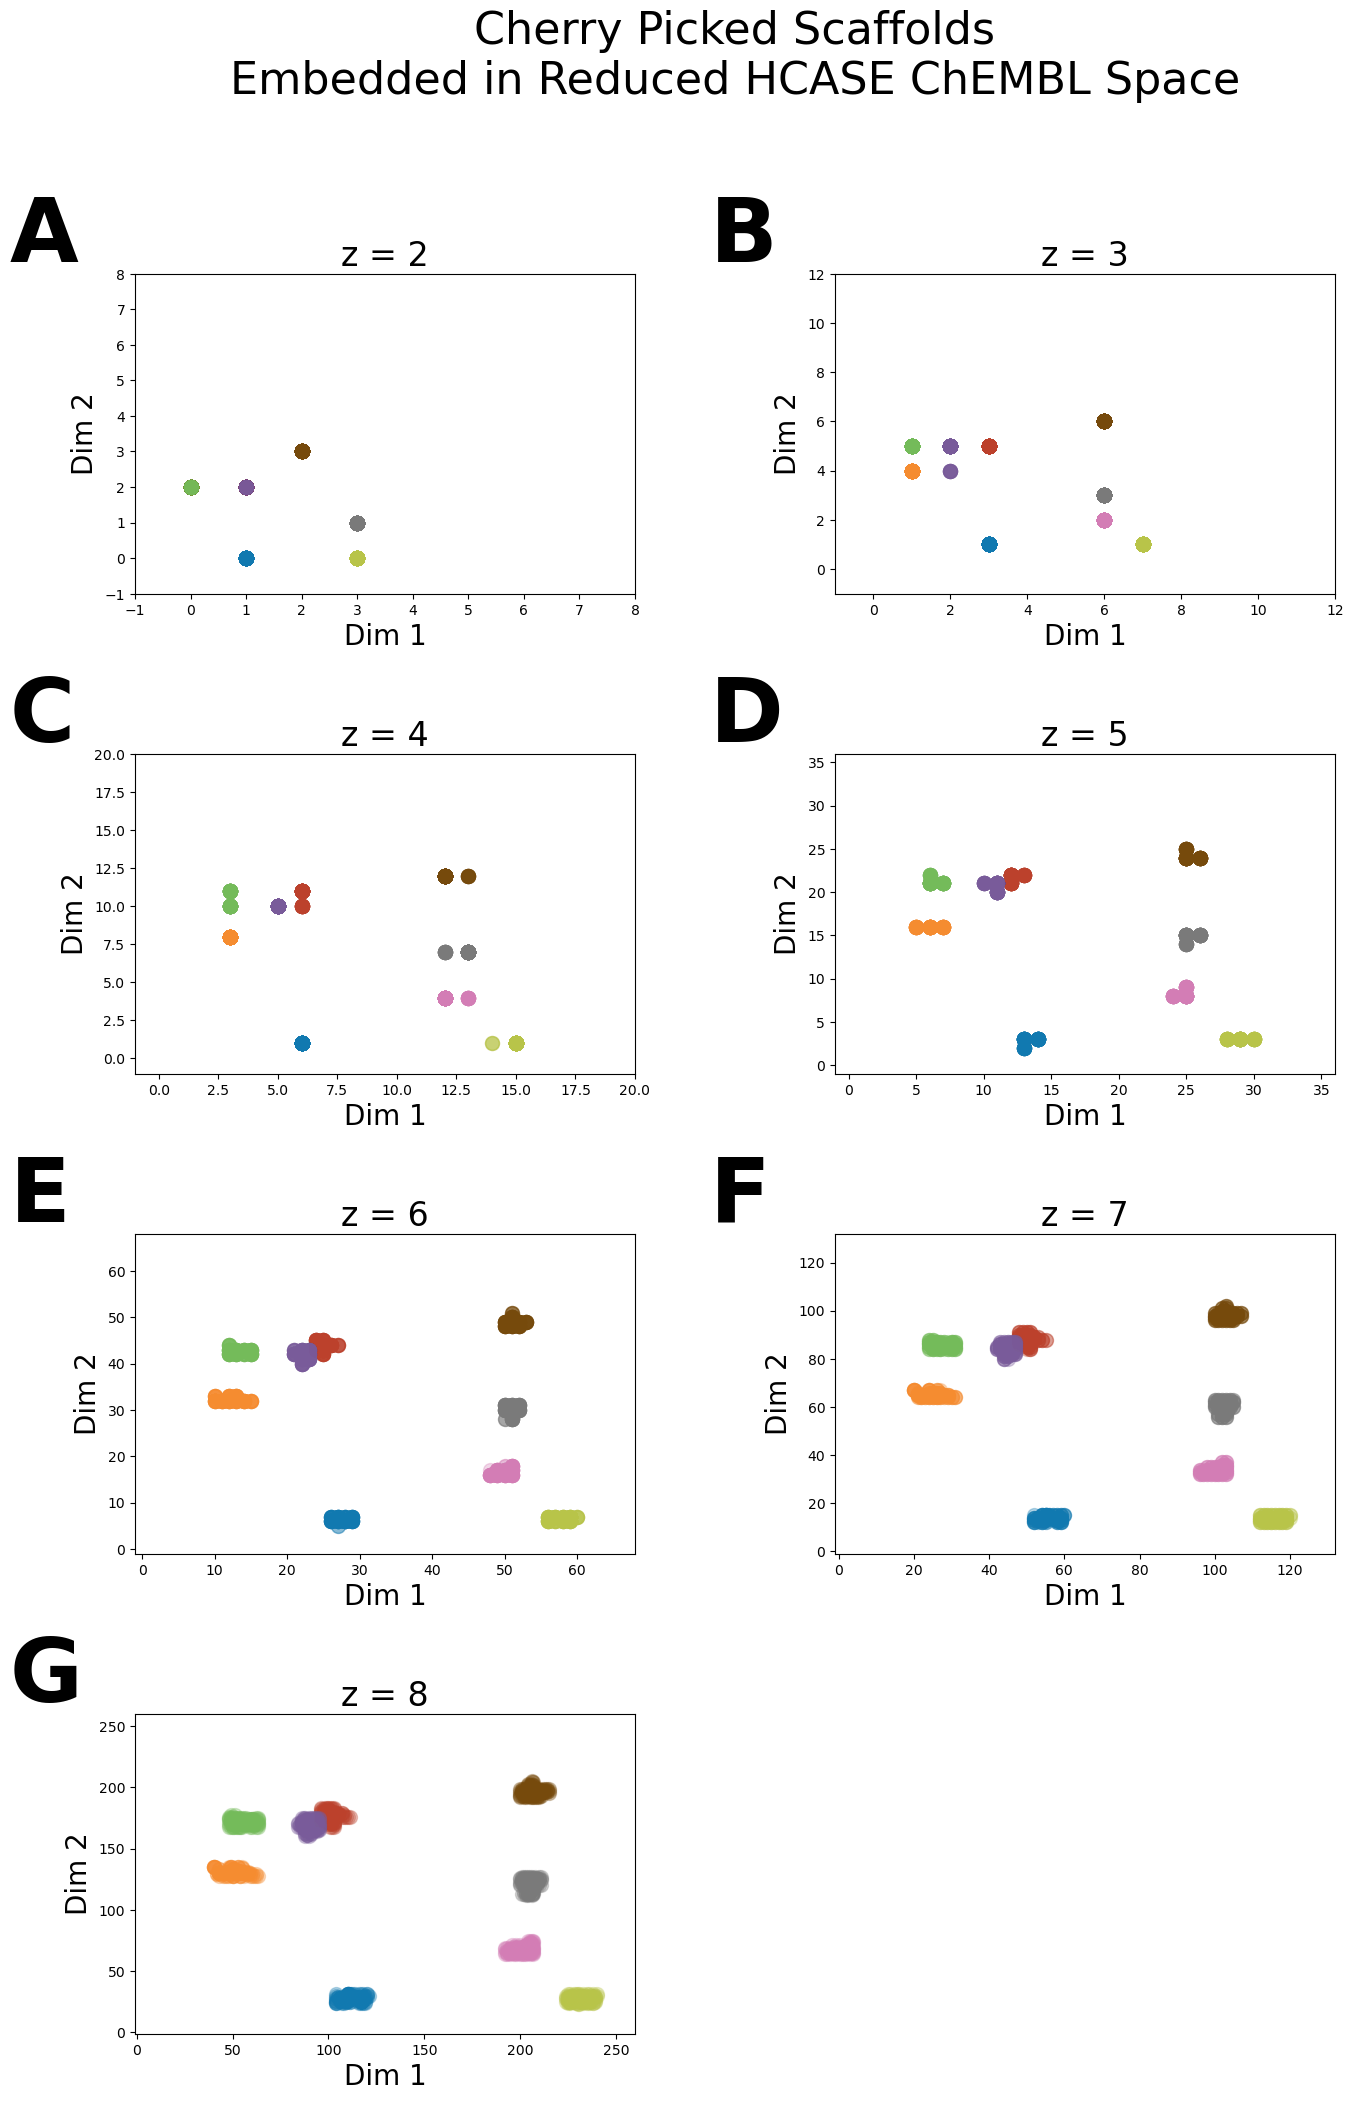

In [11]:
# Plot results


df_emb = df_embedded

adf_2 = df_emb[df_emb['hc_order'] == 2].copy()
adf_3 = df_emb[df_emb['hc_order'] == 3].copy()
adf_4 = df_emb[df_emb['hc_order'] == 4].copy()
adf_5 = df_emb[df_emb['hc_order'] == 5].copy()
adf_6 = df_emb[df_emb['hc_order'] == 6].copy()
adf_7 = df_emb[df_emb['hc_order'] == 7].copy()
adf_8 = df_emb[df_emb['hc_order'] == 8].copy()





df_2_color = color_scaffolds(adf_2, df_structures)
df_3_color = color_scaffolds(adf_3, df_structures)
df_4_color = color_scaffolds(adf_4, df_structures)
df_5_color = color_scaffolds(adf_5, df_structures)
df_6_color = color_scaffolds(adf_6, df_structures)
df_7_color = color_scaffolds(adf_7, df_structures)
df_8_color = color_scaffolds(adf_8, df_structures)



fig = plt.figure()

fig, subfigures = plt.subplots(nrows = 4, ncols = 2, figsize = (15, 22))

panel_plot_multi_scaffolds (subfigures[0][0], df_2_color, subfig_label = 'z = ', z = 2)
panel_plot_multi_scaffolds (subfigures[0][1], df_3_color, subfig_label = 'z = ', z = 3)
panel_plot_multi_scaffolds (subfigures[1][0], df_4_color, subfig_label = 'z = ', z = 4)
panel_plot_multi_scaffolds (subfigures[1][1], df_5_color, subfig_label = 'z = ', z = 5)
panel_plot_multi_scaffolds (subfigures[2][0], df_6_color, subfig_label = 'z = ', z = 6)
panel_plot_multi_scaffolds (subfigures[2][1], df_7_color, subfig_label = 'z = ', z = 7)
panel_plot_multi_scaffolds (subfigures[3][0], df_8_color, subfig_label = 'z = ', z = 8)

subfigures[3][1].axis('off')

subfigures[0][0].text(-0.25, 1.25, "A", transform=subfigures[0][0].transAxes,
            fontsize=64, fontweight='bold', va='top')
subfigures[0][1].text(-0.25, 1.25, "B", transform=subfigures[0][1].transAxes,
            fontsize=64, fontweight='bold', va='top')
subfigures[1][0].text(-0.25, 1.25, "C", transform=subfigures[1][0].transAxes,
            fontsize=64, fontweight='bold', va='top')
subfigures[1][1].text(-0.25, 1.25, "D", transform=subfigures[1][1].transAxes,
            fontsize=64, fontweight='bold', va='top')
subfigures[2][0].text(-0.25, 1.25, "E", transform=subfigures[2][0].transAxes,
            fontsize=64, fontweight='bold', va='top')
subfigures[2][1].text(-0.25, 1.25, "F", transform=subfigures[2][1].transAxes,
            fontsize=64, fontweight='bold', va='top')
subfigures[3][0].text(-0.25, 1.25, "G", transform=subfigures[3][0].transAxes,
            fontsize=64, fontweight='bold', va='top')

fig.suptitle('Cherry Picked Scaffolds\nEmbedded in Reduced HCASE ChEMBL Space', fontsize = 32, y = 1.02)
#fig.supylabel('Dim 2')


plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.5)

plt.savefig (fname_out_cp_scaffold_hcase_embedding_plot, dpi=300)

plt.show()







df_2_color['phc_order'] = 2
df_3_color['phc_order'] = 3
df_4_color['phc_order'] = 4
df_5_color['phc_order'] = 5
df_6_color['phc_order'] = 6
df_7_color['phc_order'] = 7
df_8_color['phc_order'] = 8


df_coords = df_2_color.append(df_3_color, ignore_index = True)
df_coords = df_coords.append(df_4_color, ignore_index = True)
df_coords = df_coords.append(df_5_color, ignore_index = True)
df_coords = df_coords.append(df_6_color, ignore_index = True)
df_coords = df_coords.append(df_7_color, ignore_index = True)
df_coords = df_coords.append(df_8_color, ignore_index = True)

df_coords.to_csv (fname_out_colored_embedding, sep = '\t', index = False)




In [12]:
# References:

# Ref: https://github.com/matplotlib/matplotlib/issues/3466/
# Ref: https://htmlcolorcodes.com/color-picker/
# Ref: https://iwatobipen.wordpress.com/2017/11/03/draw-high-quality-molecular-image-in-rdkit-rdkit/
# Ref: https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html
# Ref: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
# Ref: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html
# Ref: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.title.html
# Ref: https://matplotlib.org/3.1.1/api/markers_api.html#module-matplotlib.markers
# Ref: https://matplotlib.org/3.1.1/gallery/shapes_and_collections/scatter.html
# Ref: https://matplotlib.org/3.1.1/tutorials/colors/colors.html
# Ref: https://python-graph-gallery.com/106-seaborn-style-on-matplotlib-plot/
# Ref: https://python-graph-gallery.com/122-multiple-lines-chart/
# Ref: https://python-graph-gallery.com/125-small-multiples-for-line-chart/
# Ref: https://python-graph-gallery.com/197-available-color-palettes-with-matplotlib/
# Ref: https://seaborn.pydata.org/examples/many_facets.html
# Ref: https://stackoverflow.com/questions/14432557/matplotlib-scatter-plot-with-different-text-at-each-data-point
# Ref: https://stackoverflow.com/questions/14827650/pyplot-scatter-plot-marker-size
# Ref: https://stackoverflow.com/questions/17682216/scatter-plot-and-color-mapping-in-python
# Ref: https://stackoverflow.com/questions/31686530/matplotlib-generate-a-new-graph-in-a-new-window-for-subsequent-program-runs/31686783
# Ref: https://stackoverflow.com/questions/39870642/matplotlib-how-to-plot-a-high-resolution-graph
# Ref: https://stackoverflow.com/questions/57568311/matplotlib-scatter-issue-with-python-3-x
# Ref: https://www.nceas.ucsb.edu/~frazier/RSpatialGuides/colorPaletteCheatsheet.pdf
# Ref: https://www.pluralsight.com/guides/choosing-color-palettes
# Ref: https://www.rdkit.org/docs/GettingStartedInPython.html
# Ref: https://www.rdkit.org/docs/source/rdkit.Chem.Draw.html
# Ref: https://www.science-emergence.com/Articles/How-to-create-a-scatter-plot-with-several-colors-in-matplotlib-/
# Ref: ChatGPT 4.0 by OpenAI [https://chat.openai.com]